In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler


In [0]:
!pip install yfinance --upgrade --no-cache-dir

  Created wheel for yfinance: filename=yfinance-0.1.45-cp36-none-any.whl size=14652 sha256=9149c324c7621264086bbdeecdfd318a3aba98aad5561657f26e1aceddfea2f8
  Stored in directory: /tmp/pip-ephem-wheel-cache-9k7hn5zy/wheels/0c/d1/df/aa9a7744a4ac353cc9a1f2c3aaea7c1f457fc49de4286f2d88
Successfully built yfinance


In [0]:
import pandas as pd
import datetime
import pandas_datareader.data as web
from pandas import Series, DataFrame


start = datetime.datetime(2001, 1, 1)
end = datetime.datetime(2019, 9, 11)

df = web.DataReader("RELIANCE.NS", 'yahoo', start, end)
df.head()


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2001-01-01,53.675701,52.949402,53.105499,53.378899,19259768.0,24.117231
2001-01-02,56.073200,53.144600,53.160198,55.339100,42408935.0,25.002876
2001-01-03,56.494900,55.136101,55.448399,56.237202,56622894.0,25.408649
2001-01-04,57.307098,55.635899,56.088799,55.885799,38303310.0,25.249889
2001-01-05,57.291500,55.682701,55.682701,56.901001,47762434.0,25.708565


In [0]:
close_px = df['Adj Close']
mavg = close_px.rolling(window=100).mean()

In [0]:
mavg.tail(10)

Date
2019-08-26    1287.739939
2019-08-27    1286.963337
2019-08-28    1285.754491
2019-08-29    1284.351526
2019-08-30    1283.160763
2019-09-03    1281.768779
2019-09-04    1280.315842
2019-09-05    1279.082548
2019-09-06    1278.036541
2019-09-09    1277.017864
Name: Adj Close, dtype: float64

In [0]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-09-03,1243.000000,1200.000000,1242.250000,1206.400024,8563009.0,1206.400024
2019-09-04,1205.250000,1186.050049,1200.550049,1201.150024,15063355.0,1201.150024
2019-09-05,1213.199951,1193.300049,1206.800049,1198.599976,10512763.0,1198.599976
2019-09-06,1229.000000,1195.250000,1203.000000,1222.500000,10600234.0,1222.500000
2019-09-09,1233.000000,1213.150024,1220.650024,1222.199951,5370638.0,1222.199951


In [0]:
df.shape

(4621, 6)

In [0]:
df['HighLow_PCT']= (df['High'] - df['Low']) / df['Close'] * 100

In [0]:
df['PCT_CHANGE'] = (df['Close'] - df['Open']) / df['Open'] * 100

In [0]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close,HighLow_PCT,PCT_CHANGE
Date,,,,,,,,
2019-09-03,1243.000000,1200.000000,1242.250000,1206.400024,8563009.0,1206.400024,3.564324,-2.885891
2019-09-04,1205.250000,1186.050049,1200.550049,1201.150024,15063355.0,1201.150024,1.598464,0.049975
2019-09-05,1213.199951,1193.300049,1206.800049,1198.599976,10512763.0,1198.599976,1.660262,-0.679489
2019-09-06,1229.000000,1195.250000,1203.000000,1222.500000,10600234.0,1222.500000,2.760736,1.620948
2019-09-09,1233.000000,1213.150024,1220.650024,1222.199951,5370638.0,1222.199951,1.624119,0.126976


In [0]:
window_size = 32 # this is allowing us to look back 32 days in past
# Prepare the data so that we have 32 day windows and predict what the next day should be

# Get indices of access for the data
num_samples = len(df) - window_size
indices = np.arange(num_samples).astype(np.int)[:,None] + np.arange(window_size + 1).astype(np.int)

In [0]:
data = df['Adj Close'].values[indices] # Create the 2D matrix of training samples


In [0]:
data.shape

(4589, 33)

In [0]:
X = data[:,:-1] # Each row represents 32 days in the past
y = data[:,-1] # Each output value represents the 33rd day

In [0]:
# Train and test split
split_fraction = 0.95
ind_split = int(split_fraction * num_samples)
X_train = X[:ind_split]
y_train = y[:ind_split]
X_test = X[ind_split:]
y_test = y[ind_split:]

In [0]:
X_train.shape

(4359, 32)

In [0]:
y_train.shape

(4359,)

 ## Model #1 - Ridge Regressor

In [0]:
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)

# Infer
y_pred_ridge = ridge_model.predict(X_test)

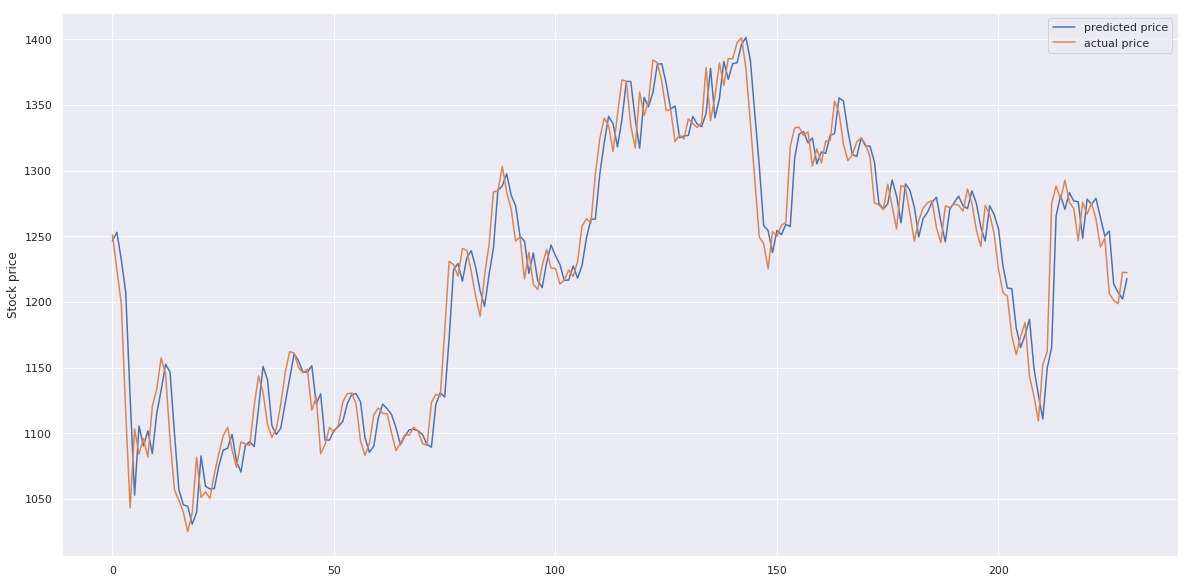

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_ridge)
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

 ## Model #2 - Gradient Boosting Trees

In [0]:

gb_model = GradientBoostingRegressor()
gb_model.fit(X_train, y_train)

# Infer
y_pred_gb = gb_model.predict(X_test)

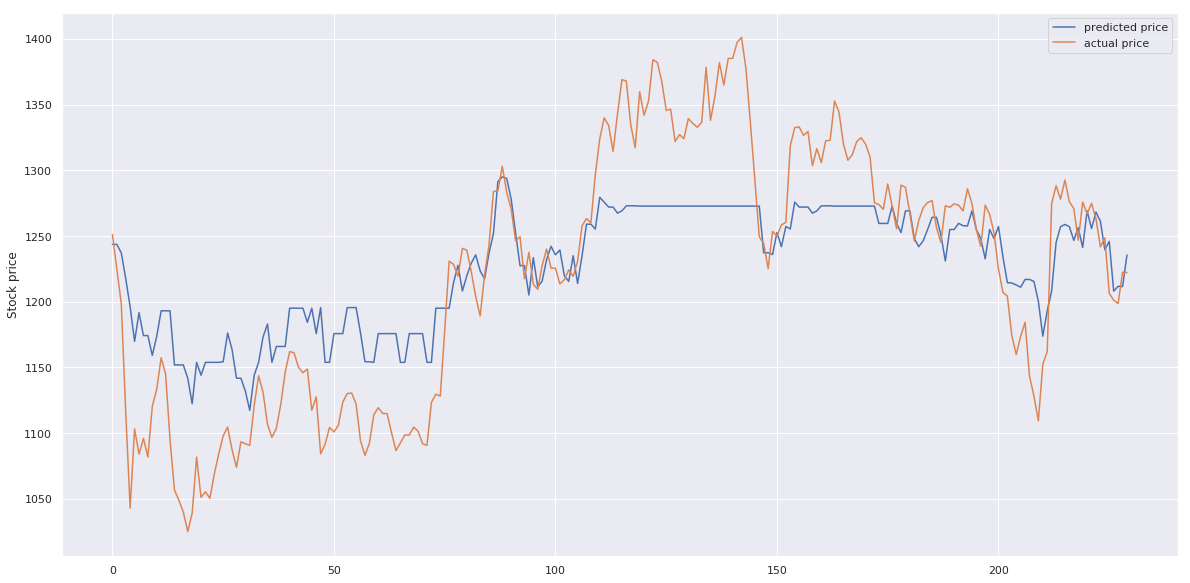

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_gb)
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

 ## Model #3 - Random Forest Regressior

In [0]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

y_pred_rf = rf_model.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


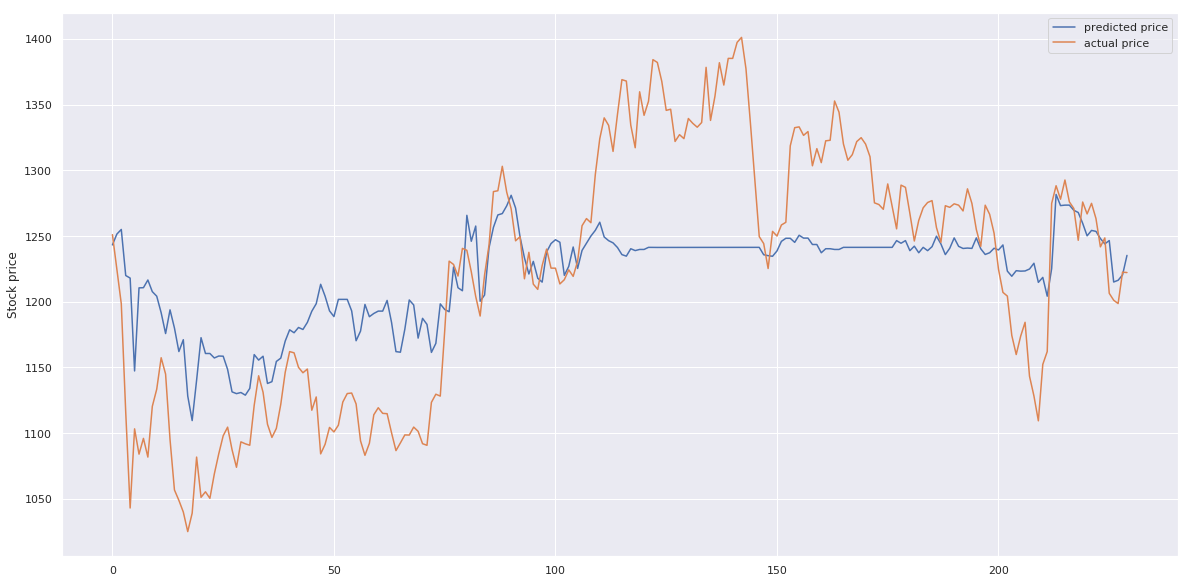

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_rf)
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

 ## Model #4 - Keras Regression

In [0]:
from keras import Sequential
from keras.layers import Dense,Dropout
def build_regressor():
    regressor = Sequential()
    regressor.add(Dense(units=128, input_dim=32))
    regressor.add(Dense(units=64))
    regressor.add(Dense(units=32))
    regressor.add(Dense(units=16))
    regressor.add(Dense(units=8))
    regressor.add(Dense(units=1))
    regressor.compile(optimizer='adam', loss='mean_squared_error',)
    return regressor

Using TensorFlow backend.


In [0]:
from keras.wrappers.scikit_learn import KerasRegressor
regressor = KerasRegressor(build_fn=build_regressor, batch_size=1024,epochs=1000)

In [0]:
results=regressor.fit(X_train,y_train)







Epoch 1/1000
4359/4359 [==============================] - 1s 275us/step - loss: 2098700.1304
Epoch 2/1000
4359/4359 [==============================] - 0s 5us/step - loss: 1020107.0877
Epoch 3/1000
4359/4359 [==============================] - 0s 6us/step - loss: 64005.2732
Epoch 4/1000
4359/4359 [==============================] - 0s 5us/step - loss: 256572.7955
Epoch 5/1000
4359/4359 [==============================] - 0s 5us/step - loss: 98307.4422
Epoch 6/1000
4359/4359 [==============================] - 0s 6us/step - loss: 18537.9279
Epoch 7/1000
4359/4359 [==============================] - 0s 5us/step - loss: 57135.1595
Epoch 8/1000
4359/4359 [==============================] - 0s 5us/step - loss: 11313.7856
Epoch 9/1000
4359/4359 [==============================] - 0s 6us/step - loss: 8731.7692
Epoch 10/1000
4359/4359 [==============================] - 0s 5us/step - loss: 12215.7091
Epoch 11/1000
4359/4359 [==============================] - 0s 5us/step - loss: 2206.8989
Epoch 12

In [0]:
y_pred_dl = regressor.predict(X_test)

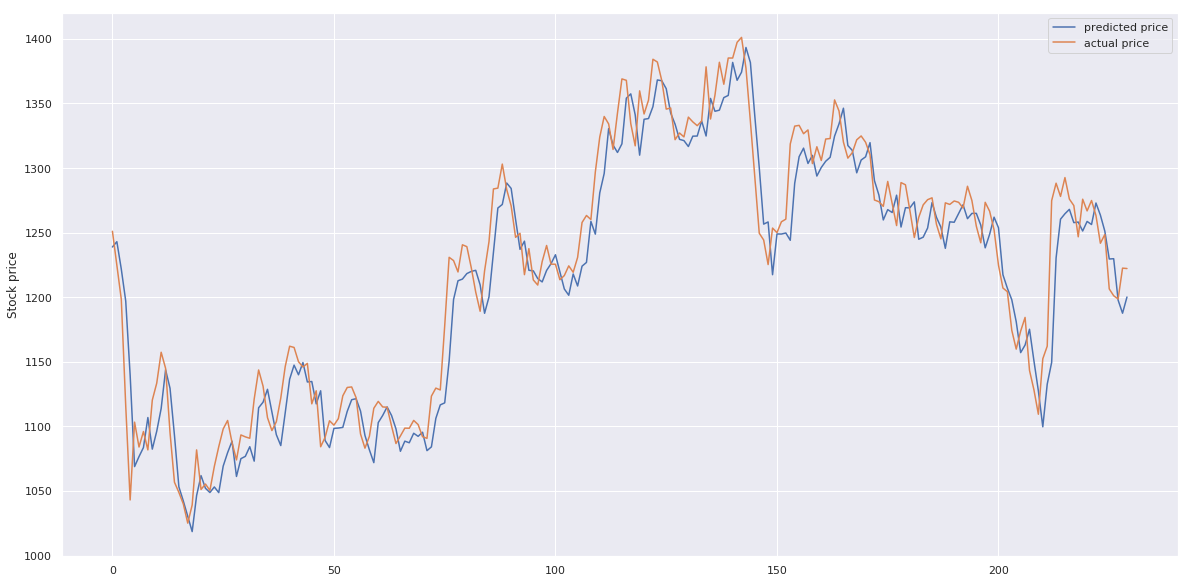

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.plot(y_pred_dl)
plt.plot(y_test)
plt.legend(['predicted price','actual price'])
plt.ylabel('Stock price')

plt.show()

## Conclusions

1.   ridge regression is performing better in this case.
2.   Random forest model and sgd regresors are not good options here
3.   we can further try hyperparameter tuning to achive better results